### Import relevant libraries

In [1]:
# Best libraries for data preprocessing
import numpy as np
import pandas as pd

### Load raw data

In [2]:
raw_data = pd.read_csv('Absenteeism_data.csv')
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [8]:
# Create a copy of raw_data for further process
df = raw_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [ ]:
# There is no missing value so we don't need to process

### Cleaning and Processing data

In [9]:
# Drop ID column which is not necessary
df = df.drop(['ID'],axis=1)
df.tail()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,28,31/05/2018,291,31,40,237.656,25,1,1,1,2


In [10]:
# Process Reason for Absence
# Value in this column have categorical meaning but they're containing number
# Thus, we must convert this column to categorical data
np.sort(df['Reason for Absence'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [11]:
reason_for_absence = pd.get_dummies(df['Reason for Absence'],drop_first=True,dtype=int)
reason_for_absence

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# There are totally 28 columns, using all of them for our model is not necessary so we group them into 4 main group.
# Type A groups Various Diseases from 1 to 14
reason_type_A = reason_for_absence.loc[:,0:14].max(axis=1)
reason_type_A

0      0
1      0
2      0
3      1
4      0
      ..
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: int32

In [13]:
# Type B groups Pregnancy or Giving Birth from 15 to 17
reason_type_B = reason_for_absence.loc[:,15:17].max(axis=1)
reason_type_B

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Length: 700, dtype: int32

In [14]:
# Type C groups Poisoning from 18 to 21
reason_type_C = reason_for_absence.loc[:,18:21].max(axis=1)
reason_type_C

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Length: 700, dtype: int32

In [15]:
# Type D groups Light Reasons such as a detal appointment, medical consultation,.. from 22 to 28
reason_type_D = reason_for_absence.loc[:,22:].max(axis=1)
reason_type_D

0      1
1      0
2      1
3      0
4      1
      ..
695    0
696    0
697    0
698    1
699    1
Length: 700, dtype: int32

In [16]:
# Concatenate 4 groups of Reason for Absence to the dataset
df = pd.concat([df,reason_type_A,reason_type_B,reason_type_C,reason_type_D],axis=1)
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 0, 1, 2, 3], dtype=object)

In [17]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [21]:
# Change and reorder the column name
name_column1 = ['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Type_1', 'Type_2', 'Type_3', 'Type_4']
df.columns = name_column1
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Type_1,Type_2,Type_3,Type_4
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [22]:
df = df[['Type_1', 'Type_2', 'Type_3', 'Type_4','Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours']]
df.head()

,Type_1,Type_2,Type_3,Type_4,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [23]:
# After we convert Reason for Absence to category value, then we drop Reason for Absence column
df = df.drop(['Reason for Absence'],axis=1)
df.head()

,Type_1,Type_2,Type_3,Type_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [24]:
# Because type of value i Data column is string, if we want to use, we have to convert to Timestamp type
type(df['Date'][0])

str

In [25]:
# Convert str date to timestamp
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
# Extract month of the year
include_month = []
for i in range(700):
    include_month.append(df['Date'][i].month)
include_month

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [27]:
# Add Month column to our data
df['Month'] = include_month
df.head()

,Type_1,Type_2,Type_3,Type_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [28]:
# Maybe days are near weekend employee tend to be absent, so we extract day of week from date and add to the data
def extract_day(day_of_week):
    return day_of_week.weekday()

df['Day of Week'] = df['Date'].apply(extract_day)
df.head()

,Type_1,Type_2,Type_3,Type_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [29]:
# After extracting necessary information, we drop Date column
df = df.drop(['Date'],axis=1)
df.columns

Index(['Type_1', 'Type_2', 'Type_3', 'Type_4', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 'Month',
       'Day of Week'],
      dtype='object')

In [30]:
# Now we reorer column name, we move Month and Day of Week column to the position of Date column
df = df[['Type_1', 'Type_2', 'Type_3', 'Type_4','Month', 'Day of Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours']]
df.head()

,Type_1,Type_2,Type_3,Type_4,Month,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


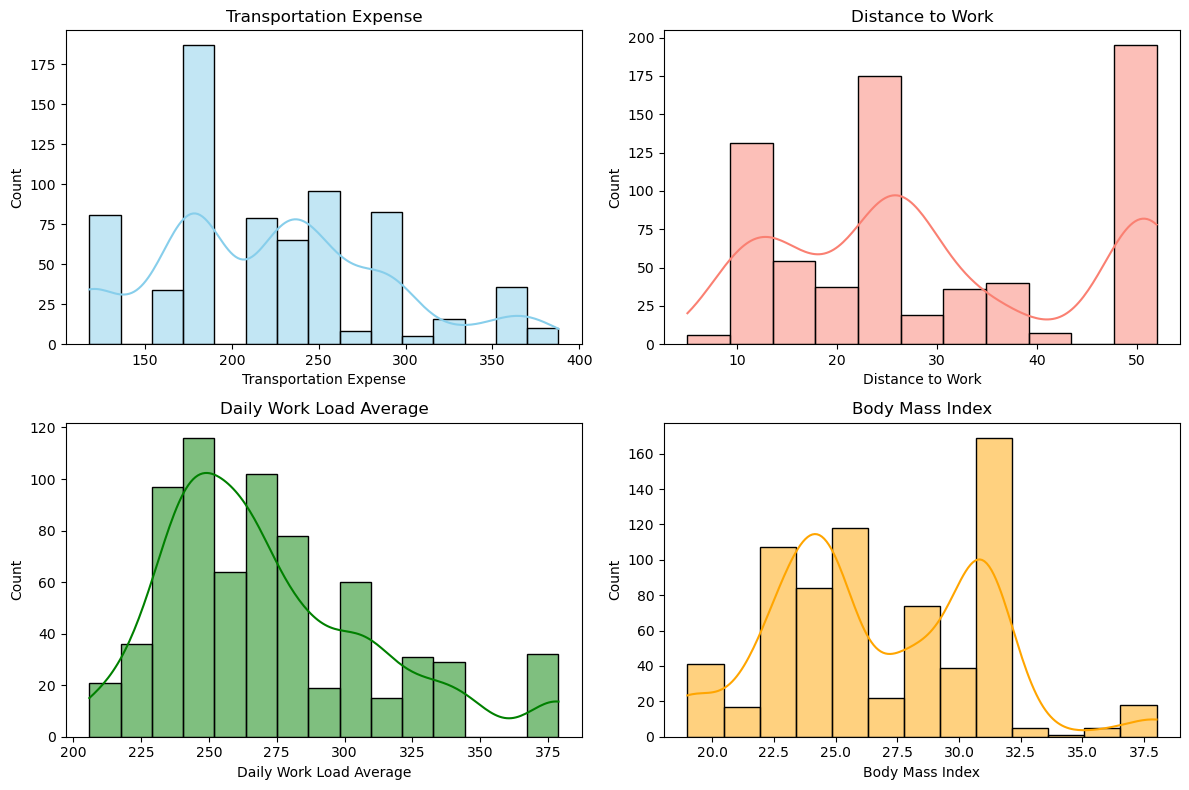

In [31]:
# Next, we consider numerical columns to check outlier
import matplotlib.pyplot as plt
import seaborn as sns

# We just check for Transportation Expense,Distance to Work, Daily Work Load Average and Body Mass Index
# Because they'are easier to have outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Transportation Expense'], kde=True, color='skyblue')
plt.title('Transportation Expense')

plt.subplot(2, 2, 2)
sns.histplot(df['Distance to Work'], kde=True, color='salmon')
plt.title('Distance to Work')

plt.subplot(2, 2, 3)
sns.histplot(df['Daily Work Load Average'], kde=True, color='green')
plt.title('Daily Work Load Average')

plt.subplot(2, 2, 4)
sns.histplot(df['Body Mass Index'], kde=True, color='orange')
plt.title('Body Mass Index')

plt.tight_layout()
plt.show()

In [32]:
# These distribution above illustrate that all of value are in a reasonable and acceptable range
# They are all meaningful for out model so we don't need to process outlier, that's good.

In [33]:
# Finally we process Educatio column which is also a category
# 1 : high school
# 2 : graduate 
# 3 : postgraduate
# 4 : a master or a doctor
df['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [34]:
# Our solution to convert 4 value Education to categorical value is:
# We choose high school for 1 group (0) and three others 1 group (1)
df['Education'] = df['Education'].map({1:0,3:1,2:1,4:1})
df['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

### Define the target

In [35]:
# Our case study is determine who is Excessively absent, who is Moderately absent
# So I made up my mind to take the median value of "Absenteeism Time in Hours" and use it as a cut-off line
# If the absent time > median = Excessively absent (1) and <= median = Excessively absent (0)
df['Absenteeism Time in Hours'].value_counts()

Absenteeism Time in Hours
8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
56       2
80       2
120      2
112      2
7        1
104      1
48       1
Name: count, dtype: int64

In [36]:
df['Absenteeism Time in Hours'] = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)
df['Absenteeism Time in Hours']

0      1
1      0
2      0
3      1
4      0
      ..
695    1
696    0
697    1
698    0
699    0
Name: Absenteeism Time in Hours, Length: 700, dtype: int32

In [37]:
# We check whether the data is balanced or not
df['Absenteeism Time in Hours'].sum()/df['Absenteeism Time in Hours'].shape[0]

0.45571428571428574

In [38]:
# The percentage of Excessively absent and Moderately absent is 45,5% and 54,5% respectively.
# This shows that out data is pretty balanced. That's a great condition for our model

In [39]:
# We change the name Absenteeism Time in Hours to Targets column
df.columns.values

array(['Type_1', 'Type_2', 'Type_3', 'Type_4', 'Month', 'Day of Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

In [40]:
df.columns = ['Type_1', 'Type_2', 'Type_3', 'Type_4', 'Month', 'Day of Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Targets']

In [41]:
df.head(10)

,Type_1,Type_2,Type_3,Type_4,Month,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Targets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0
5,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,0
6,0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,1
7,0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,1
8,0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,1
9,0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,1


In [42]:
# After our dataset is preprocessed and cleaned, we save it for modeling step
df_preprocessed_with_targets = df.copy()
df_preprocessed_with_targets.to_csv('df_preprocessed_with_targets.csv',index=False)